In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm
import datetime
from scipy.optimize import curve_fit

ModuleNotFoundError: No module named 'pmdarima'

In [6]:
pip install pmdarima

  Using cached pmdarima-2.0.2-cp39-cp39-macosx_10_9_x86_64.whl (608 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
df = pd.read_csv('testLong.csv')
df['Month'] = pd.to_datetime(df['Month'])
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'testLong.csv'

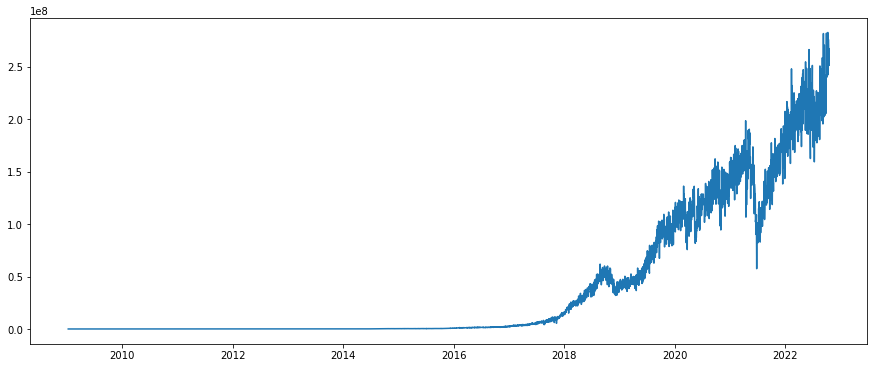

In [4]:
plt.figure(figsize=(15, 6))
plt.plot(df['Month'], df['Hash'])

In [5]:
train = df[:int(len(df)*0.9)]
test = df[int(0.9*len(df)):]
train.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)
test.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)

/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_12256/1291124300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)
/var/folders/6v/prbg9yl95vzfc3swbz1llv040000gn/T/ipykernel_12256/1291124300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(['Difficulty', 'Addresses'], axis = 1, inplace = True)


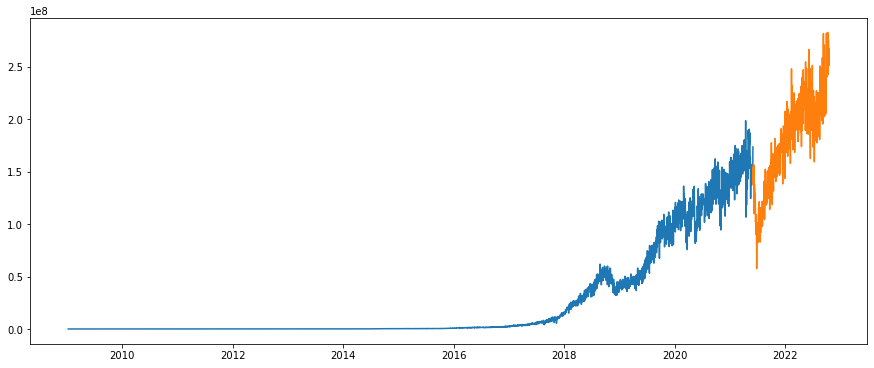

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(train['Month'], train['Hash'])
plt.plot(test['Month'], test['Hash'])

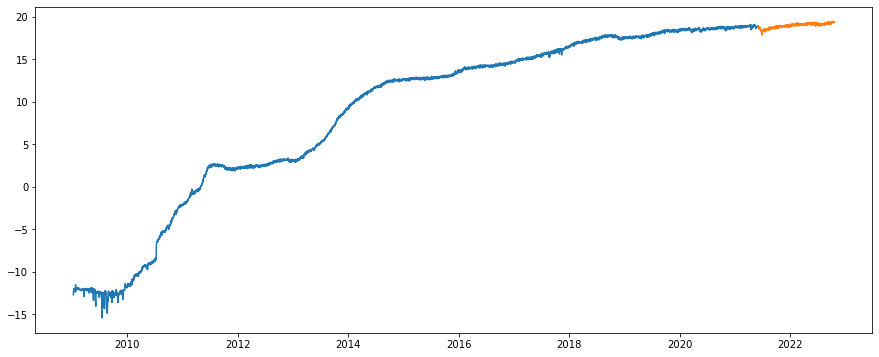

In [7]:
plt.figure(figsize=(15, 6))
plt.plot(train['Month'], np.log(train['Hash']))
plt.plot(test['Month'], np.log(test['Hash']))

In [8]:
#train['mod'] = np.log(train['Hash'])
#model = pm.auto_arima((np.log(train['Hash'])))

In [9]:
model = pm.auto_arima((train['Hash']))

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered

In [10]:
# #plt.plot(train['Month'], train['Hash'])
# plt.plot(test['Month'], test['Hash'], label = 'Test')
# plt.plot(test['Month'], prediction['predicted_sales'], label = 'pred')
# plt.show()

In [11]:
# plt.fill_between(test['Month'], conf_int[:, 0], conf_int[:, 1])
# plt.plot(test['Month'], test['Hash'], label = 'Test')
# plt.plot(test['Month'], prediction['predicted_sales'], label = 'pred')
# plt.show()

In [12]:
dates = pd.date_range(start='21-OCT-2022', end='31-DEC-2030').to_frame()
dates['Month'] = dates.index
dates['Hash'] = 0
print(dates.columns)
dates.drop([0], axis = 1, inplace = True)
#print(dates)

Index([0, 'Month', 'Hash'], dtype='object')


In [13]:
new = pd.concat([test, dates])
print(new)

                         Month         Hash
4527                2021-06-03  153804388.7
4528                2021-06-04  137063775.1
4529                2021-06-05  137063775.1
4530                2021-06-06  156943254.8
4531                2021-06-07  139156352.0
...                        ...          ...
2030-12-27 00:00:00 2030-12-27          0.0
2030-12-28 00:00:00 2030-12-28          0.0
2030-12-29 00:00:00 2030-12-29          0.0
2030-12-30 00:00:00 2030-12-30          0.0
2030-12-31 00:00:00 2030-12-31          0.0

[3498 rows x 2 columns]


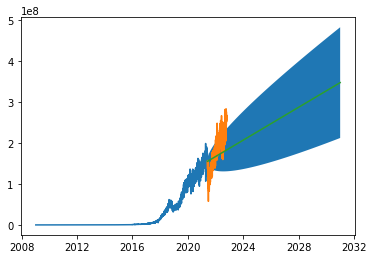

In [15]:
preds, conf_int = model.predict(n_periods=new.shape[0], return_conf_int=True, alpha = 0.05)
plt.fill_between(new['Month'], conf_int[:, 0], conf_int[:, 1])
plt.plot(train['Month'], train['Hash'], label = 'Test')
plt.plot(test['Month'], test['Hash'], label = 'Test')
plt.plot(new['Month'], preds, label = 'pred')
plt.show()

In [16]:
model_exp = pm.auto_arima(np.log(train['Hash']))

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered

In [17]:
preds_exp, conf_int_exp = model_exp.predict(n_periods=new.shape[0], return_conf_int=True, alpha = 0.05)

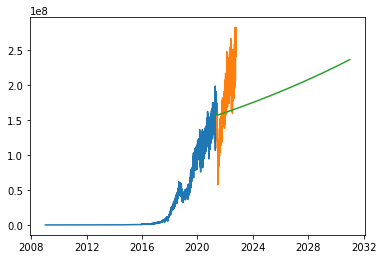

In [21]:
#plt.fill_between(new['Month'], np.exp(conf_int_exp[:, 0]), np.exp(conf_int_exp[:, 1]))
plt.plot(train['Month'], train['Hash'], label = 'Test')
plt.plot(test['Month'], test['Hash'], label = 'Test')
plt.plot(new['Month'], np.exp(preds_exp), label = 'pred')
plt.show()

In [25]:
print(train["Month"][1100])

2012-01-15 00:00:00


In [26]:
truncated_months = train[1100:]

In [28]:
model_trunc = pm.auto_arima((truncated_months['Hash']))

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered

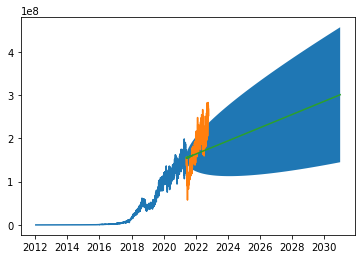

In [29]:
preds, conf_int = model_trunc.predict(n_periods=new.shape[0], return_conf_int=True, alpha = 0.05)
plt.fill_between(new['Month'], conf_int[:, 0], conf_int[:, 1])
plt.plot(truncated_months['Month'], truncated_months['Hash'], label = 'Test')
plt.plot(test['Month'], test['Hash'], label = 'Test')
plt.plot(new['Month'], preds, label = 'pred')
plt.show()

In [30]:
model_trunc_exp = pm.auto_arima(np.log(truncated_months['Hash']))

/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1899: RuntimeWarning: invalid value encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/antonio_ortiz/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1906: RuntimeWarning: invalid value encountered

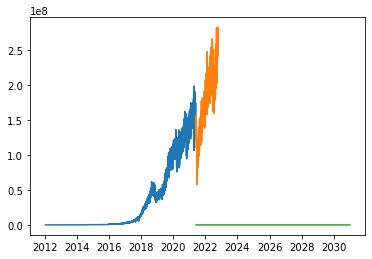

In [36]:
preds, conf_int = model_trunc_exp.predict(n_periods=new.shape[0], return_conf_int=True, alpha = 0.05)
plt.fill_between(new['Month'], conf_int[:, 0], conf_int[:, 1])
plt.plot(truncated_months['Month'], truncated_months['Hash'], label = 'Test')
plt.plot(test['Month'], test['Hash'], label = 'Test')
plt.plot(new['Month'], preds, label = 'pred')
plt.show()

          Month          Hash
1100 2012-01-15  8.642395e+00
1101 2012-01-16  1.088071e+01
1102 2012-01-17  9.761554e+00
1103 2012-01-18  7.958465e+00
1104 2012-01-19  9.326326e+00
...         ...           ...
4522 2021-05-29  1.444278e+08
4523 2021-05-30  1.508643e+08
4524 2021-05-31  1.475267e+08
4525 2021-06-01  1.485729e+08
4526 2021-06-02  1.736839e+08

[3427 rows x 2 columns]
